In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
covariance = np.array([[0.14, -0.3, 0.0, 0.2],
                       [-0.3, 1.16, 0.2, -0.8],
                       [0.0, 0.2, 1.0, 1.0],
                       [0.2, -0.8, 1.0, 2.0]])
precision = np.linalg.inv(covariance)
print(precision)

[[ 60.   50.  -48.   38. ]
 [ 50.   50.  -50.   40. ]
 [-48.  -50.   52.4 -41.4]
 [ 38.   40.  -41.4  33.4]]


In [26]:
def generate_pair():
    return np.random.multivariate_normal([0.8, 0.8], [[0.1, -0.1],[-0.1, 0.12]])

In [27]:
mu_t = generate_pair()
print(mu_t)

[ 0.27611644  1.17809259]


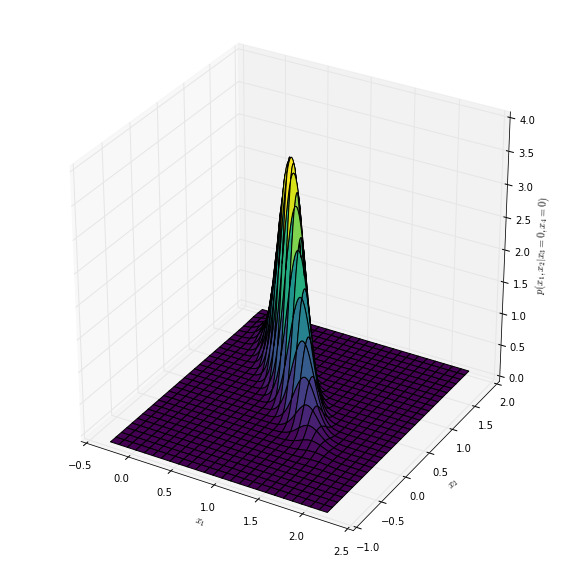

In [43]:
x, y = np.mgrid[-0.25:2.25:.01, -1:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
mu_p = [0.8, 0.8]
cov_p = [[0.1, -0.1], [-0.1, 0.12]]
z = multivariate_normal(mu_p, cov_p).pdf(pos)

fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_zlabel('$p(x_1, x_2 | x_3=0, x_4=0)$')
plt.savefig('plots/cond_mvg.png', bbox_inches='tight', dpi=300)
plt.show()

In [3]:
N = 1000

In [3]:
# data = np.random.multivariate_normal([0.28, 1.18], [[2.0, 0.8], [0.8, 4.0]], N)

In [4]:
# np.savetxt('data.txt', data)
data = np.loadtxt('data.txt')

In [5]:
mu_ml = data.mean(axis=0)
x = data - mu_ml
cov_ml = np.dot(x.T, x) / N
cov_ml_unbiased = np.dot(x.T, x) / (N - 1)
print(mu_ml)
print(cov_ml)
print(cov_ml_unbiased)

[ 0.25260341  1.21164341]
[[ 2.02283861  0.82815475]
 [ 0.82815475  3.62573469]]
[[ 2.02486347  0.82898374]
 [ 0.82898374  3.62936406]]


In [79]:
def seq_ml(data):
    mus = [np.array([[0], [0]])]
    for i in range(N):
        x_n = data[i].reshape(2, 1)
        mu_n = mus[-1] + (x_n-mus[-1]) / (i + 1)
        mus.append(mu_n)
    return mus

In [80]:
mus_ml = seq_ml(data)
print(mus_ml[-1])

[[ 0.25260341]
 [ 1.21164341]]


In [8]:
mu_p = np.array([[0.28], [1.18]])
cov_p = np.array([[0.1, -0.1], [-0.1, 0.12]])
cov_t = np.array([[2.0, 0.8], [0.8, 4.0]])

In [61]:
def seq_map(data, mu_p, cov_p, cov_t):
    mus, covs = [mu_p], [cov_p]
    for x in data:
        x_n = x.reshape(2, 1)
        cov_n = np.linalg.inv(np.linalg.inv(covs[-1]) + np.linalg.inv(cov_t))
        mu_n = cov_n.dot(np.linalg.inv(cov_t).dot(x_n) + np.linalg.inv(covs[-1]).dot(mus[-1]))
        mus.append(mu_n)
        covs.append(cov_n)
        
    return mus, covs

In [62]:
mus_map, covs_map = seq_map(data, mu_p, cov_p, cov_t)
print(mus_map[-1])

[[ 0.25264202]
 [ 1.21099048]]


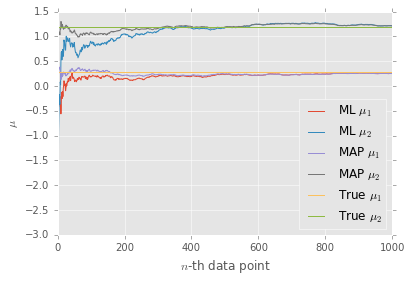

In [92]:
X = np.arange(N+1)
mus1_ml = [mu[0] for mu in mus_ml]
mus2_ml = [mu[1] for mu in mus_ml]
mus1_map = [mu[0] for mu in mus_map]
mus2_map = [mu[1] for mu in mus_map]
mus1_t = [0.28] * (N+1)
mus2_t = [1.18] * (N+1)
plt.style.use('ggplot')
plt.plot(X, mus1_ml, label='ML $\mu_1$')
plt.plot(X, mus2_ml, label='ML $\mu_2$')
plt.plot(X, mus1_map, label='MAP $\mu_1$')
plt.plot(X, mus2_map, label='MAP $\mu_2$')
plt.plot(X, mus1_t, label='True $\mu_1$')
plt.plot(X, mus2_t, label='True $\mu_2$')
plt.xlabel('$n$-th data point')
plt.ylabel('$\mu$')
plt.legend(loc=4)
plt.savefig('plots/seq_learning.png', bbox_inches='tight', dpi=300)
plt.show()

In [95]:
def p_xk(x, alpha, beta):
    return beta / (np.pi * (beta**2 + (x-alpha)**2))

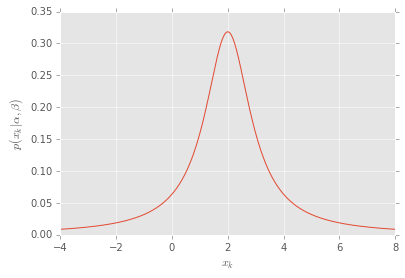

In [97]:
x = np.linspace(-4, 8, num=1000)
probs = p_xk(x, 2, 1)
plt.plot(x, probs)
plt.xlabel('$x_k$')
plt.ylabel(r'$p(x_k | \alpha, \beta)$')
plt.savefig('plots/prob_xk.png', bbox_inches='tight', dpi=300)
plt.show()

In [100]:
def p_a(x, alpha, beta):
    return np.product(beta / (np.pi * beta**2 + (x-alpha)**2))

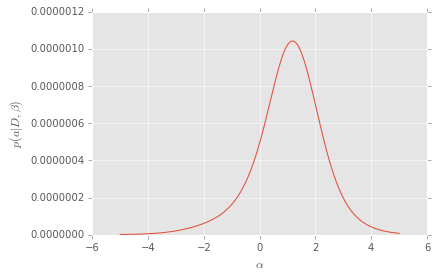

In [108]:
D = np.array([4.8, -2.7, 2.2, 1.1, 0.8, -7.3])
alphas = np.linspace(-5, 5, num=1000)
beta = 1
likelihoods = [p_a(D, alpha, beta) for alpha in alphas]
plt.plot(alphas, likelihoods)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$p(a | D, \beta)$')
plt.savefig('plots/prob_a.png', bbox_inches='tight', dpi=300)
plt.show()

In [110]:
print(D.mean())
print(alphas[np.argmax(likelihoods)])

-0.183333333333
1.17617617618


In [149]:
alpha_t = np.random.uniform(0, 10)
beta_t = np.random.uniform(1, 2)
print(alpha_t, beta_t)

6.033717305187508 1.7612379420066158


In [150]:
def location(angle, alpha, beta):
    return beta * np.tan(angle) + alpha

N = 200
angles = np.random.uniform(-np.pi/2, np.pi/2, N)
locations = np.array([location(angle, alpha_t, beta_t) for angle in angles])

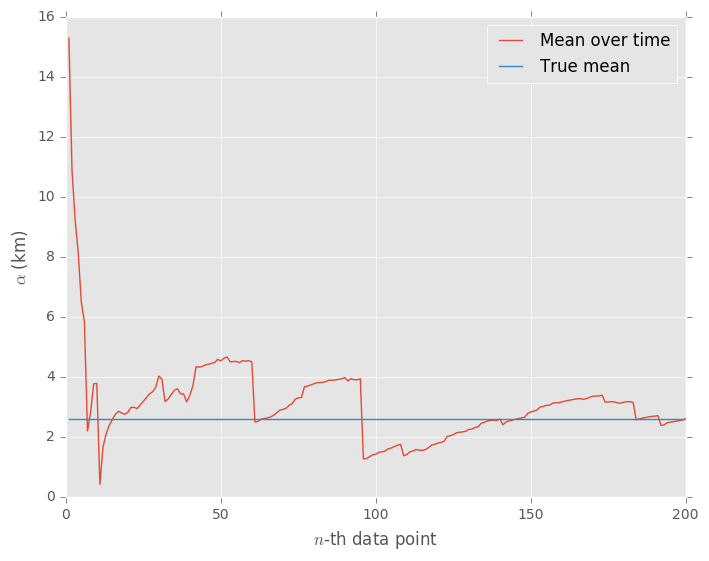

In [152]:
mus = [locations[:i + 1].mean() for i in range(N)]
mean = [locations.mean()] * (N)
X = np.arange(1, N + 1)
plt.style.use('ggplot')
plt.plot(X, mus, label='Mean over time')
plt.plot(X, mean, label='True mean')
plt.xlabel('$n$-th data point')
plt.ylabel(r'$\alpha$ (km)')
plt.legend()
plt.savefig('plots/mean_x.png', bbox_inches='tight', dpi=300)
plt.show()

In [153]:
print(locations.mean())

2.61338838823


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:161: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


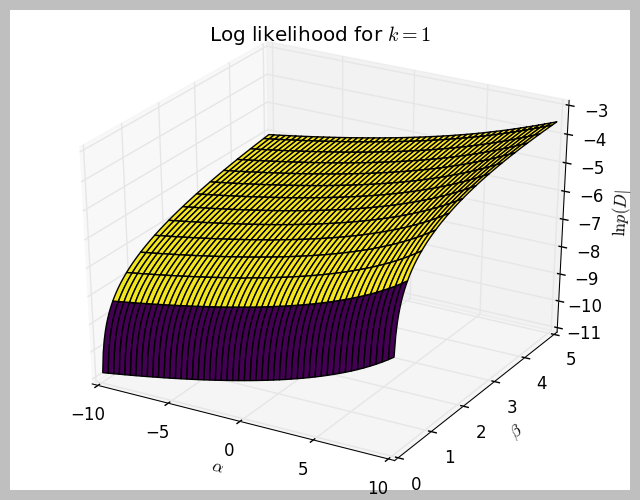

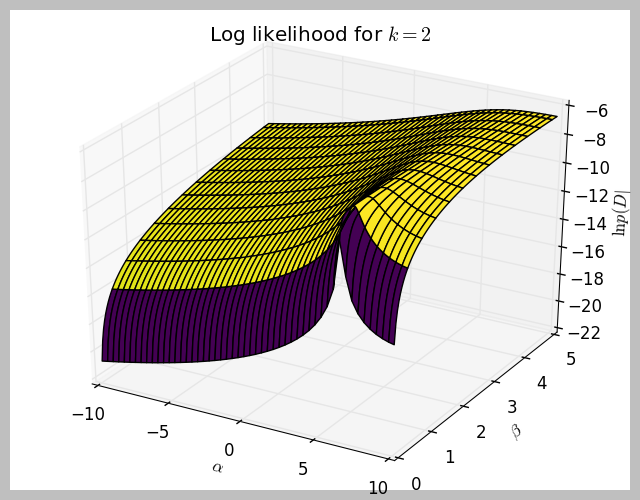

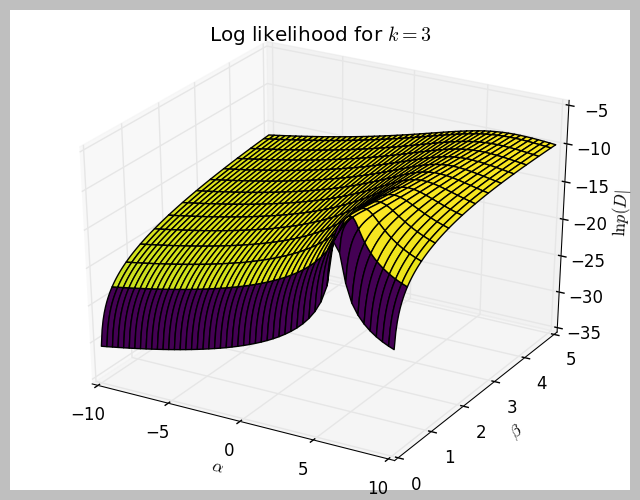

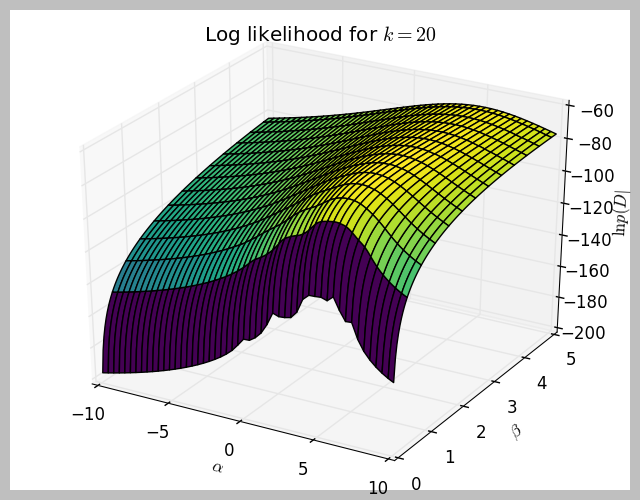

In [154]:
plt.style.use('classic')
ks = [1, 2, 3, 20]
alphas, betas = np.mgrid[-10:10:0.04, 0:5:0.04]
# alphas, betas = np.meshgrid(np.linspace(-10, 10, num=500), np.linspace(0, 5, num=250))
for k in ks:
    x = locations[:k]
    # We only have to calculate the constant once
    likelihood = k * np.log(betas/np.pi)
    for loc in x:
        likelihood -= np.log(betas**2 + (loc - alphas)**2)
        
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(alphas, betas, likelihood, cmap=plt.cm.viridis, vmin=-200, vmax=likelihood.max())
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\beta$')
    ax.set_zlabel('$\ln p(D | \alpha, \beta)$')
    plt.title('Log likelihood for $k = {}$'.format(k))
    plt.savefig('plots/logl_{}.png'.format(k), bbox_inches='tight', dpi=300)
    plt.show()
    

In [168]:
from scipy.optimize import fmin

def log_likelihood(params, locations):
    alpha, beta = params
    likelihood = len(locations) * np.log(beta/np.pi)
    for loc in locations:
        likelihood -= np.log(beta**2 + (loc - alpha)**2)
    return -likelihood
    
def plot_maximize_logl(data, alpha_t, beta_t):
    alphas, betas = [], []
    x = np.arange(len(data))
    for k in x:
        [alpha, beta] = fmin(log_likelihood, (0, 1), args=(data[:k],))
        alphas.append(alpha)
        betas.append(beta)
    
    plt.style.use('ggplot')
    plt.plot(x, alphas, label=r'$\alpha$')
    plt.plot(x ,betas, label=r'$\beta$')
    plt.plot(x, [alpha_t]*len(data), label=r'$\alpha_t$')
    plt.plot(x, [beta_t]*len(data), label=r'$\beta_t$')
    plt.xlabel('$k$')
    plt.ylabel('location (km)')
    plt.legend()
    plt.savefig('plots/min_logl.png', bbox_inches='tight', dpi=300)
    plt.show()

    print(alphas[-1], betas[-1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 6.639755
         Iterations: 93
         Function evaluations: 183
Optimization terminated successfully.
         Current function value: 7.577200
         Iterations: 88
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: 10.060852
         Iterations: 77
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 14.821072
         Iterations: 79
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 17.918686
         Iterations: 81
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 24.651251
         Iterations: 71
         Function evaluations: 137
Optimization terminated 

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


Optimization terminated successfully.
         Current function value: 90.451953
         Iterations: 77
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 94.329174
         Iterations: 76
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 101.367944
         Iterations: 77
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 103.145999
         Iterations: 78
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 105.989246
         Iterations: 74
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 108.977815
         Iterations: 77
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 110.689758
         Iterations: 72
         Function evaluations: 140
Optimization te

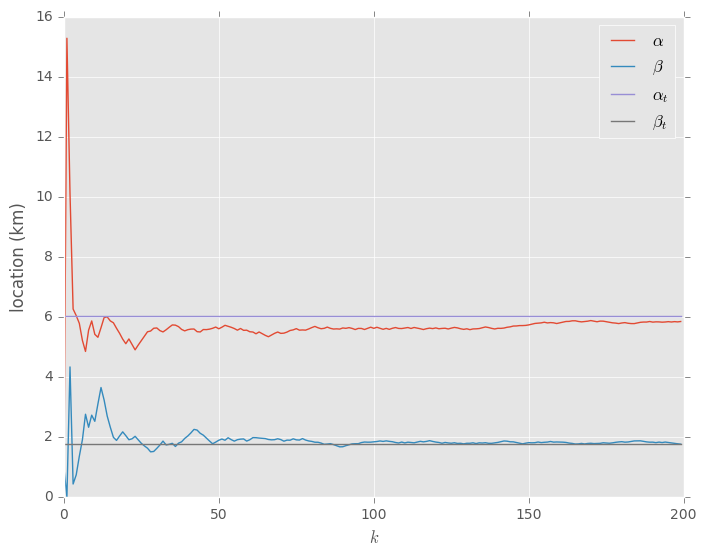

5.84778390909 1.75916594764


In [169]:
plot_maximize_logl(locations, alpha_t, beta_t)